In [24]:
from keras.models import load_model

In [25]:
model = load_model('cats_and_dogs_small_2.h5')

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)      

In [27]:
img_path = r'C:\Users\ahsaa\Desktop\cats_and_dogs_small\test\cats\cat.1700.jpg'

In [28]:
from keras.preprocessing import image
import numpy as np

In [29]:
img = image.load_img(img_path, target_size=(150, 150))

In [30]:
img_tensor = image.img_to_array(img)

In [31]:
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

In [32]:
print(img_tensor.shape)

(1, 150, 150, 3)


In [33]:
import matplotlib.pyplot as plt

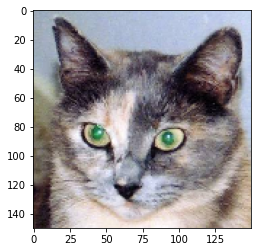

In [34]:
plt.imshow(img_tensor[0])

In [35]:
plt.show()

In [37]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [38]:
activations = activation_model.predict(img_tensor)

In [40]:
len(activations)

8

In [41]:
activations[0]

array([[[[0.12883022, 0.        , 0.13129741, ..., 0.        ,
          0.10159913, 0.        ],
         [0.13754606, 0.        , 0.13662557, ..., 0.00087266,
          0.10861663, 0.        ],
         [0.13775745, 0.        , 0.13908328, ..., 0.        ,
          0.10228241, 0.        ],
         ...,
         [0.19076477, 0.        , 0.1837335 , ..., 0.        ,
          0.14390565, 0.        ],
         [0.19450712, 0.        , 0.19362955, ..., 0.        ,
          0.15225706, 0.        ],
         [0.18931198, 0.        , 0.19195479, ..., 0.        ,
          0.15121613, 0.        ]],

        [[0.12678555, 0.        , 0.13084173, ..., 0.        ,
          0.10139849, 0.        ],
         [0.1365912 , 0.        , 0.13779601, ..., 0.00209329,
          0.1079468 , 0.        ],
         [0.14083026, 0.        , 0.13754767, ..., 0.        ,
          0.10642062, 0.        ],
         ...,
         [0.18768841, 0.        , 0.18611988, ..., 0.        ,
          0.14669424, 0. 

In [42]:
activations[0].shape

(1, 148, 148, 32)

In [43]:
import matplotlib.pyplot as plt

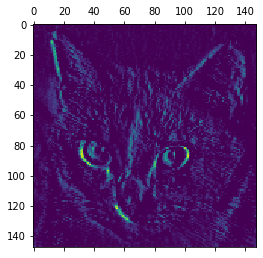

In [45]:
plt.matshow(activations[0][0, :, :, 4], cmap = 'viridis')

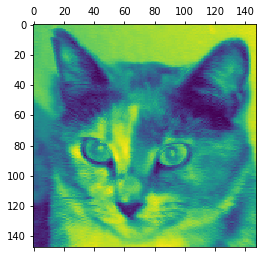

In [60]:
plt.matshow(activations[0][0, :, :, 7], cmap = 'viridis')

<ipython-input-61-a78048146818>:18: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


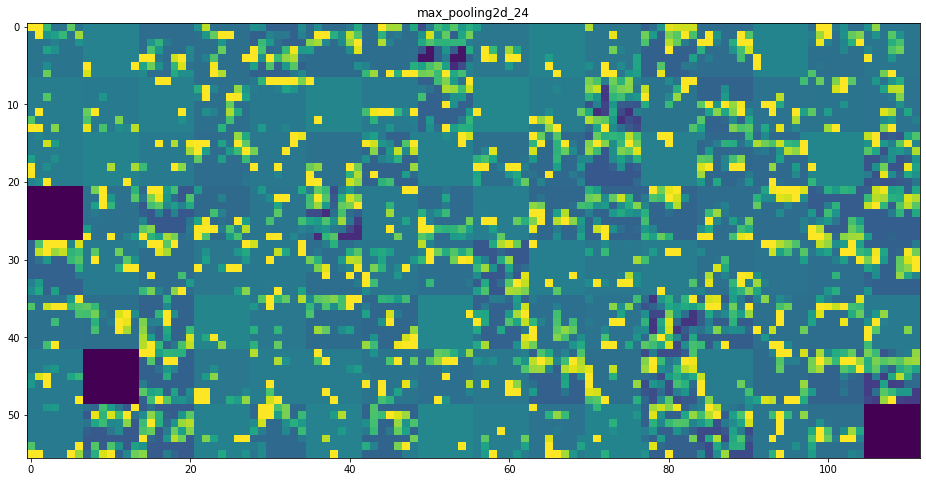

In [61]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                                :, :,
                                                col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')